In [1]:
import gymnasium as gym
from my_envs.biped import BipedEnv
from stable_baselines3 import PPO
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = PPO.load("2024-10-18-03-38_run_1")
env = BipedEnv(render_mode='human')
obs, info = env.reset()
rewards = []
ts = []
actions = []
body_vs = []
obss = []
for i in range(env.max_steps):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    rewards.append(reward)
    ts.append(env.data.time)
    actions.append(action)
    obss.append(obs)
    body_vs.append(env.data.sensor('body_v').data.copy())
    if terminated or truncated:
        break
env.close()
actions = np.array(actions)
obss = np.array(obss)
body_vs = np.array(body_vs)

In [3]:
print(np.sum(rewards))

18.76429185100676


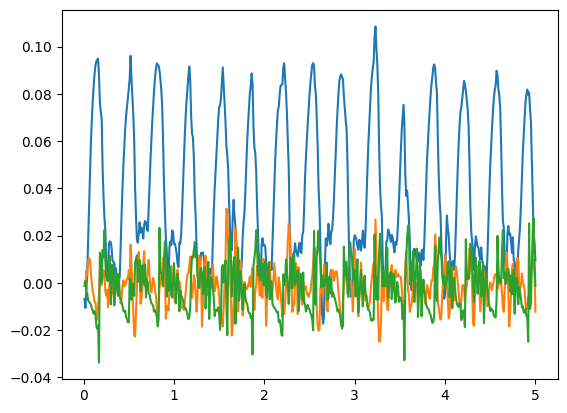

In [4]:
plt.plot(ts,body_vs)
plt.show()

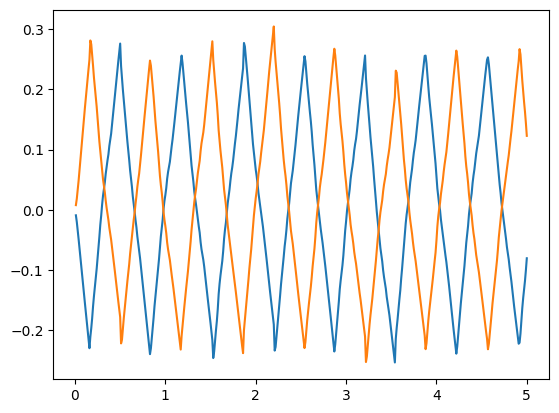

In [5]:
body_qs = obss[:,6:8]
plt.plot(ts,body_qs)
plt.show()

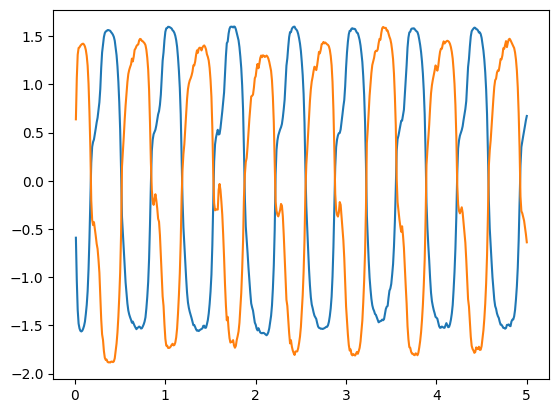

In [6]:
plt.plot(ts,actions)
plt.show()